### Project Objective- The purpose of this project is to predict future medical expenses of individuals that help medical insurance to make decisions on charging the premium.

#### DATASET SOURCE: https://www.kaggle.com/noordeen/insurance-premium-prediction

##### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading dataset in csv format

In [2]:
data=pd.read_csv('insurance.csv')

#### Exploratory Data Analysis

In [29]:
# Top 5 rows to explore data
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [30]:
# data.info() function is used to get a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From above function, we can infer that the insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region).

In [31]:
# Checking shape (rows,columns) of data
data.shape

(1338, 7)

In [32]:
# Identification of null values
data.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [4]:
# Unique values in all Features
print ("\nUnique values :  \n",data.nunique())


Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


In [33]:
# Applying describe function on data to get 6 Point summary
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


###### describe function result shows that data is normally distributed as mean and median are almost similar

In [113]:
# Outliers detection function to detect outlier rows on the basis of 1.5 IQR 

from collections import Counter


def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [114]:
data.loc[detect_outliers(data,["age","bmi","children","expenses"])]  
# It shows that 3 rows have outliers out of total 1338 rows, so, we are expecting that it won't affect data since we have only
# (3/1338)= 0.2% missing values

,age,sex,bmi,children,smoker,region,expenses
543,54,1,47.4,0,1,southeast,63770.43
860,37,1,47.6,2,1,southwest,46113.51
1047,22,0,52.6,1,1,southeast,44501.40


In [9]:
# Checking duplicacy in data whether data contains duplicate rows or not and if exists, remove duplicated rows

data = data[-data.duplicated()]

In [10]:
data.shape  # removed 1 duplicate row from data- 1338-1=1337

(1337, 7)

In [39]:
# Univariate Analysis for character variables to check values representation in categorical data

def bar_plot(variable):
      
    # get feature 
    var = data[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

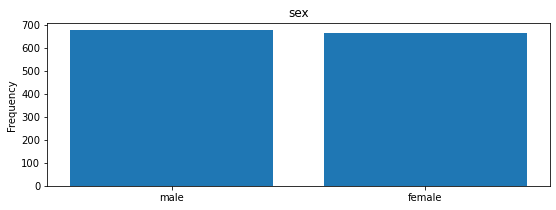

sex:
male      675
female    662
Name: sex, dtype: int64


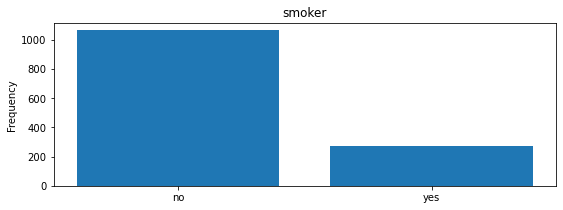

smoker:
no     1063
yes     274
Name: smoker, dtype: int64


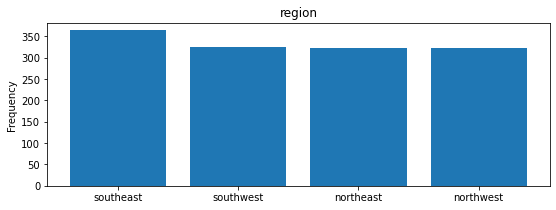

region:
southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64


In [40]:
# Discrete data
category1 = ["sex","smoker","region"]
for c in category1:
    bar_plot(c)

In [41]:
# numerical values frequency distribution

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

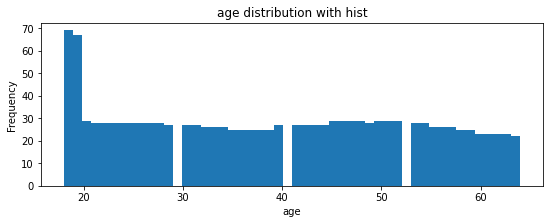

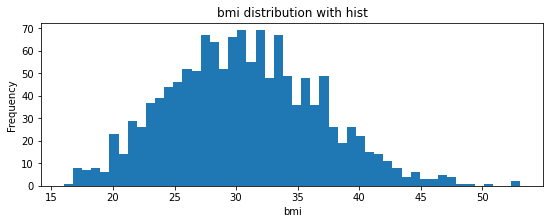

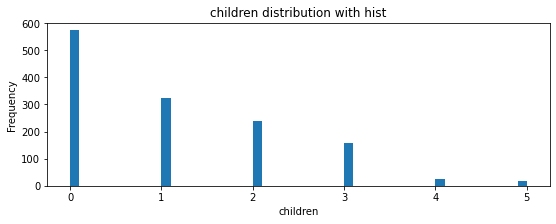

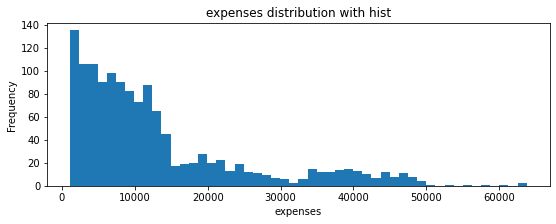

In [42]:
numericVar = ["age","bmi","children","expenses"] 
for n in numericVar:
    plot_hist(n)

##### From numerical values frequency distribution, we can see distribution of values in an attribute. As we can see distribution of values in a 'children' column, '4' and '5' number of childrens are not significantly differentiable, so can combine '4' and '5' values in a single value '4'

In [43]:
# Checking unique values with their number of occurence in a column 'children'
data['children'].value_counts()  

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
# Replacing '5' with '4'
data['children']=data['children'].replace([4,5], 4)

In [46]:
# checking whether values got replaced or not,now can see number of values in '4' got increase and '5' is not present
data['children'].value_counts()  

0    573
1    324
2    240
3    157
4     43
Name: children, dtype: int64

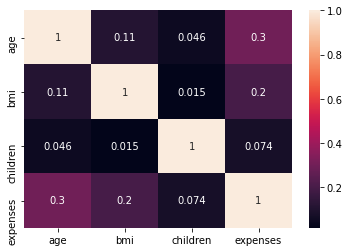

In [47]:
# Checking for correlation in data
sns.heatmap(data.corr(), annot=True) 
# From this , we can infer that linear regression won't do good here as values are not correlated much

Text(0.5, 1.0, 'Smokers')

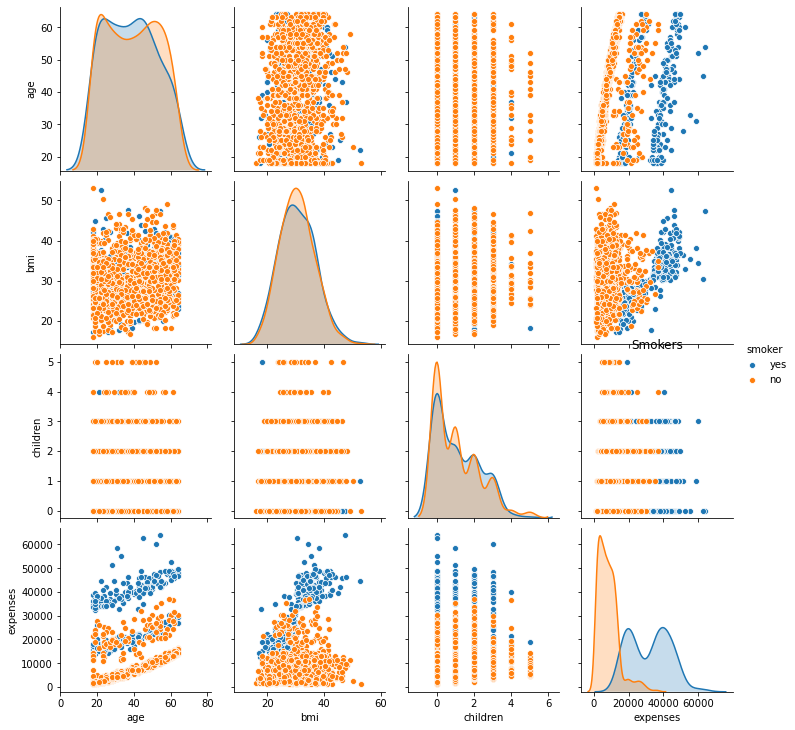

In [6]:
# Pairplot of data to get an idea of distribution of 'smoker' and 'non-smoker' among various attributes
sns.pairplot(data, hue="smoker")
plt.title("Smokers")

In [12]:
# Representing categorical values by '0' and '1' to convert object variable to numerical
# Female-1, Male-0
# Smoker-1, Non Smoker-0
data['sex']=data['sex'].replace(['female', 'male'], [1,0])
data['smoker']=data['smoker'].replace(['yes', 'no'], [1,0])

In [13]:
# Checking 'sex' and 'smoker' attributes , values are in the form of '0' and '1'
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


##### Creating numerical and character dataframes

In [14]:
num=data.select_dtypes(include='number')
char=data.select_dtypes(include='object')

In [8]:
num.head()

,age,sex,bmi,children,smoker,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [84]:
# 'smoker' vs 'non smoker' counts
num['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

##### Checking normal distribution of data in numerical dataframe

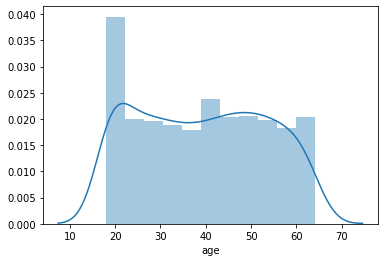

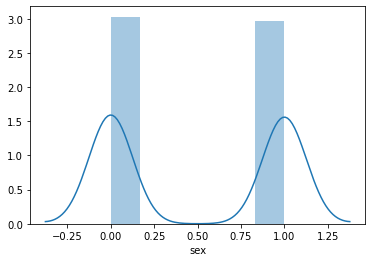

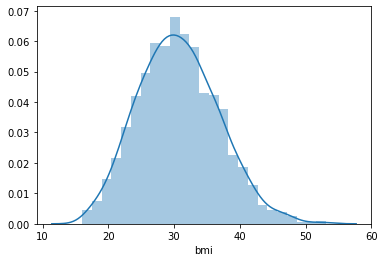

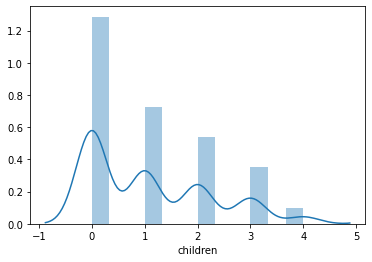

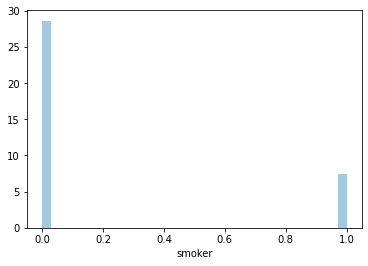

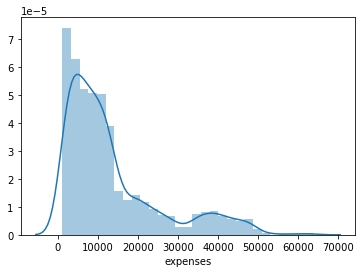

In [79]:
for col in num:    
     sns.distplot(num[col])
     plt.show()

##### Scaling Numerical dataframe to get scaled values

In [15]:
# As values in data is varying by large amount, so it is good to do scaling to bring them at same scale, and we are using
# MinMax Scaling so we get positive values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
# Scaling numerical values
num[['age', 'bmi', 'children', 'expenses']]=scaler.fit_transform(num[['age', 'bmi', 'children', 'expenses']])

In [17]:
# Checking scaled data
num.head()  # All values are between 0 and 1

,age,sex,bmi,children,smoker,expenses
0,0.021739,1,0.320755,0.00,1,0.251611
1,0.000000,0,0.479784,0.25,0,0.009636
2,0.217391,0,0.458221,0.75,0,0.053115
3,0.326087,0,0.180593,0.00,0,0.333010
4,0.304348,0,0.347709,0.00,0,0.043816


##### Character Encoding 

In [18]:
# Applying One-Hot Encoding
char_encode=pd.get_dummies(char)

In [19]:
# Checking encoded dataframe
char_encode.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


##### Creating new dataframe with numerical values

In [20]:
# Concatenating 'num' and 'char_encode' dataframes to form new dataframe
data_new=pd.concat([num,char_encode],axis=1,join='inner')
data_new.shape

(1337, 10)

In [88]:
# Checking New dataframe , have all scaled and numerical values
data_new.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,1,0.320755,0.00,1,0.251611,0,0,0,1
1,0.000000,0,0.479784,0.25,0,0.009636,0,0,1,0
2,0.217391,0,0.458221,0.75,0,0.053115,0,0,1,0
3,0.326087,0,0.180593,0.00,0,0.333010,0,1,0,0
4,0.304348,0,0.347709,0.00,0,0.043816,0,1,0,0


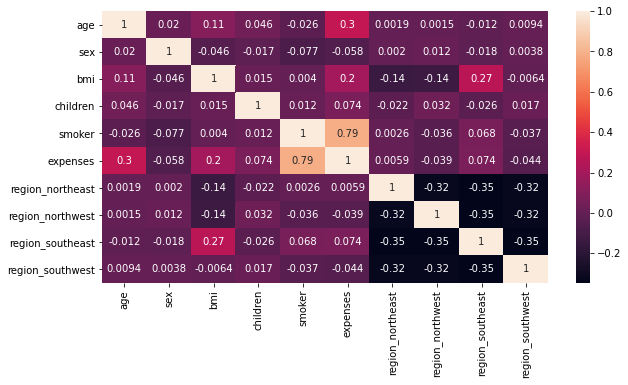

In [94]:
# Plotting Correlation plot of new dataframe
plt.figure(figsize=(10,5))
sns.heatmap(data_new.corr(), annot =True)  

###### From above correlation plot,we can infer there is high correlation between 'smoker' and 'expenses'.  It means that smoker have to expense more on insurance premium

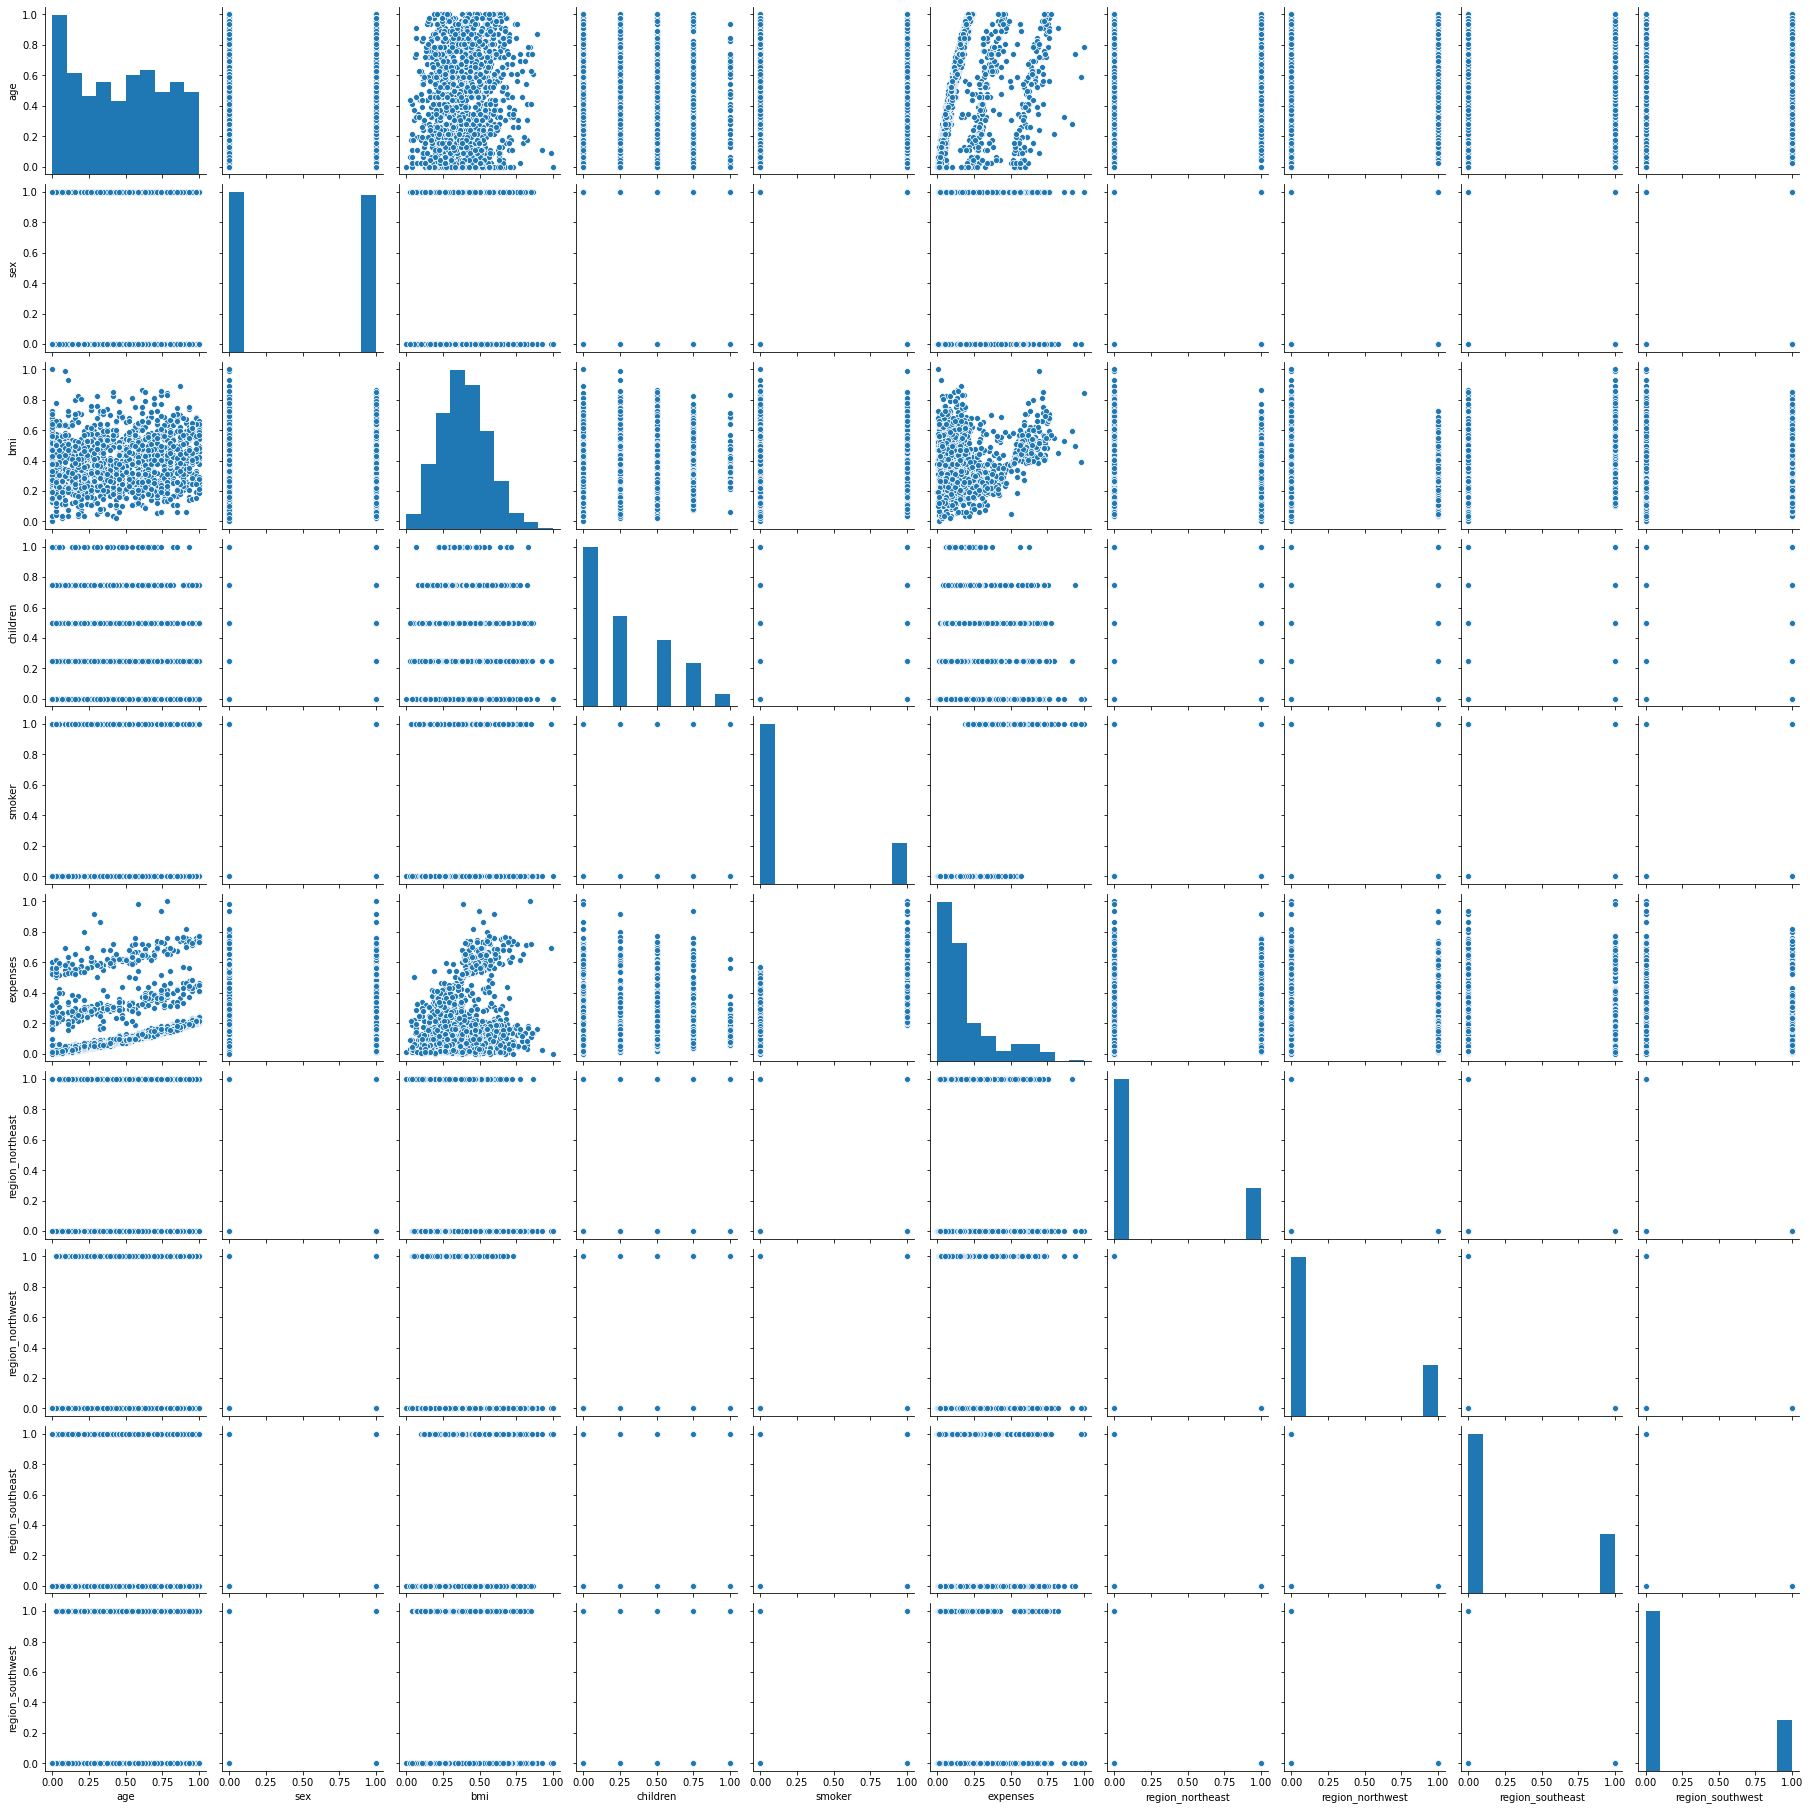

In [108]:
sns.pairplot(data_new)

##### Dividing dataset into Dependent and Independent features

In [21]:
# X- Independent features Dataframe, y- Dependent/Target feature Dataframe
X=data_new.drop(['expenses'], axis=1)
y=data_new[['expenses']]

In [22]:
# (rows,cols) in 'data_new' Dataframe
data_new.shape

(1337, 10)

##### Train Test splitting on dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Applying Linear Regression , Linear Regression with polynomial features, DT, RF, SVR, Xgboost models

###### Linear Regression

In [24]:
# Applying and fitting Linear Regression model on data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
# Coefficient values in a Linear Regression
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
region_northeast,4.702630e+12
region_northwest,4.702630e+12
region_southeast,4.702630e+12
region_southwest,4.702630e+12
smoker,3.763953e-01
age,1.780742e-01
bmi,1.777680e-01
children,3.084692e-02
sex,1.399012e-03


###### Building Statsmodel on data

In [19]:
import statsmodels.api as sm

In [20]:
# Applying 'Ordinary Least Square' technique on data
X_endog = sm.add_constant(X_train)
res = sm.OLS(y_train, X_endog)
res.fit()

In [21]:
# Test summary
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          9.12e-267
Time:                        16:08:03   Log-Likelihood:                 869.47
No. Observations:                 935   AIC:                            -1721.
Df Residuals:                     926   BIC:                            -1677.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0375      0.008     -4.474      0.000      -0.054      -0.021
age                  0.1782      0.010     17.170      0.000       0.158       0.199
sex                  0.0013      0.006      0.207      0.836      -0.011       0.014
bmi                  0.1748      0.020      8.704      0.000       0.135       0.214
children             0.0322      0.011      3.009      0.003       0.011       0.053
smoker               0.3769      0.008     47.856      0.000       0.361       0.392
region_northeast     0.0011      0.006      0.196      0.845      -0.010       0.012
region_northwest    -0.0080      0.006     -1.388      0.166      -0.019       0.003
region_southeast    -0.0118      0.006     -1.869      0.062      -0.024       0.001
region_southwest    -0.0189      0.006     -3.243      0.001      -0.030      -0.007
==============================================================================
Omnibus:                      246.328   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              685.085
Skew:                           1.330   Prob(JB):                    1.72e-149
Kurtosis:                       6.242   Cond. No.                     5.79e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### Linear Regression with polynomial features

In [47]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train) 

LinearRegression(fit_intercept=False)

In [33]:
# 'X_train' dataset shape
X_train.shape

(935, 9)

In [48]:
# polynomial features increased column numbers from 9 to 55
x_train_poly.shape  

(935, 55)

###### Decision Tree Regressor 

In [60]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=4, random_state=13)

###### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=13)

###### Support Vector Regressor

In [81]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="rbf", C=100000 )  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=100000, gamma='auto')

### Predicted values by different models and Evaluation of models

###### Evaluation for linear regression model

In [26]:
# Predicted values for linear regression
y_pred_train= regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [38]:
print('Evaluation on train data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R square on training data:', metrics.r2_score(y_train,y_pred_train))
print('\n')
print('Evaluation on test data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R square on testing data:', metrics.r2_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(regressor, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = metrics.r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linear Regression Model: ", accuracy_cv_MLR)

Evaluation on train data :
Mean Absolute Error: 0.06426869223556046
Mean Squared Error: 0.009118168699674205
Root Mean Squared Error: 0.09548910251790099
R square on training data: 0.7425307488407089


Evaluation on test data :
Mean Absolute Error: 0.06789278808207229
Mean Squared Error: 0.009868702569670283
Root Mean Squared Error: 0.09934134370779511
R square on testing data: 0.7634757893124666
Accuracy for 10-Fold Cross Predicted Multiple Linear Regression Model:  0.7474121676061437


###### Evaluation for linear regression with polynomial features

In [49]:
# Predicted values for linear regression with polynomial features
y_pred_train_poly= polynomial_reg.predict(x_train_poly)
y_pred_test_poly = polynomial_reg.predict(x_test_poly)

In [50]:
print('Evaluation on train data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_poly)))
print('R square on training data:', metrics.r2_score(y_train,y_pred_train_poly))
print('\n')
print('Evaluation on test data :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_poly)))
print('R square on testing data:', metrics.r2_score(y_test,y_pred_test_poly))

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = metrics.r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Evaluation on train data :
Mean Absolute Error: 0.04355638816711483
Mean Squared Error: 0.005537447944277256
Root Mean Squared Error: 0.07441403056062248
R square on training data: 0.8436393729370721


Evaluation on test data :
Mean Absolute Error: 0.04751280296422567
Mean Squared Error: 0.006239395897159447
Root Mean Squared Error: 0.07898984679792363
R square on testing data: 0.8504597560495759
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8377685189608836


##### Evaluation for decision tree regression model

In [61]:
# Predicted values for decision tree regression
y_pred_train_dt= decision_tree_reg.predict(X_train)
y_pred_test_dt = decision_tree_reg.predict(X_test)

In [62]:
print('Evaluation on train data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_dt)))
print('R square on training data:', metrics.r2_score(y_train,y_pred_train_dt))
print('\n')
print('Evaluation on test data :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dt)))
print('R square on testing data:', metrics.r2_score(y_test,y_pred_test_dt))

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = metrics.r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Evaluation on train data :
Mean Absolute Error: 0.03915404737009564
Mean Squared Error: 0.004655403726353441
Root Mean Squared Error: 0.06823051902450575
R square on training data: 0.8685456092393617


Evaluation on test data :
Mean Absolute Error: 0.048327963045703186
Mean Squared Error: 0.006355075680349695
Root Mean Squared Error: 0.07971872854197873
R square on testing data: 0.8476872467740741
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8501952130573636


In [63]:
## Hyperparameter tuning in Decision trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_reg = DecisionTreeRegressor(random_state=42)
tree_cv = GridSearchCV(tree_reg, params, n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_reg = DecisionTreeRegressor(**best_params)
tree_reg.fit(X_train, y_train)

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 3672 tasks      | elapsed:   39.6s


Best paramters: {'max_depth': 4, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 6498 out of 6498 | elapsed:   58.3s finished


DecisionTreeRegressor(max_depth=4, min_samples_leaf=13)

In [68]:
## Checking accuracy with Tuned DTs

from math import sqrt  # For squareroot operation
# Prediction with training dataset:
y_pred_DTR_train = tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = tree_reg.predict(X_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(metrics.mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(metrics.mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Find training accuracy for this model:
accuracy_DTR_train = metrics.r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = metrics.r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = metrics.r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)


RMSE for Training Data:  0.06830082939193365
RMSE for Testing Data:  0.07959524362840625
Training Accuracy for Decision Tree Regression Model:  0.8682745467054833
Testing Accuracy for Decision Tree Regression Model:  0.8481587485250751
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8514947666966209


##### Evaluation of Random Forest Regressor

In [74]:
# Predicted values for Random Forest regression
y_pred_train_RF= random_forest_reg.predict(X_train)
y_pred_test_RF = random_forest_reg.predict(X_test)

In [75]:
# Evaluation for Random Forest regression model
print('Evaluation on train data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_RF)))
print('R square on training data:', metrics.r2_score(y_train,y_pred_train_RF))
print('\n')
print('Evaluation on test data :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_RF)))
print('R square on testing data:', metrics.r2_score(y_test,y_pred_test_RF))

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = metrics.r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Evaluation on train data :
Mean Absolute Error: 0.03686317804392729
Mean Squared Error: 0.004442030859997352
Root Mean Squared Error: 0.06664856232505958
R square on training data: 0.87457060767138


Evaluation on test data :
Mean Absolute Error: 0.044429832610222715
Mean Squared Error: 0.005724023609748069
Root Mean Squared Error: 0.0756572773085846
R square on testing data: 0.8628117367308902
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8588882301553415


In [76]:
## Hyperparameter tuning in Random forests

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_reg = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_reg, params_grid, cv=3, verbose=2)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_reg = RandomForestRegressor(**best_params)
rf_reg.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   2.6s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   3.5s
[CV] max_depth=2, max_features=auto, min_samples_leaf

[CV]  max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, total=   3.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, total=   3.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, total=   3.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=4,

[CV]  max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] max_depth=2, max_features=auto, min_samples_lea

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.9s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   2.6s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   3.8s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=   4.0s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1500, total=   3.5s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1500, total=   3.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1500, total=   3.4s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_lea

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=sqrt, min_samples_lea

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] max_depth=2, max_features=sqrt, 

[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   3.7s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   3.8s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   3.7s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=auto, min_sample

[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.6s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   3.6s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.9s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.9s
[CV] max_depth=3, max_features=auto, min_sampl

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.7s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.7s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   4.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   4.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   4.1s
[CV] max_depth=3, max_features=sqrt, min_samples_lea

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   5.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500, total=   1.8s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   3.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=   3.5s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, 

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   3.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   3.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500, total=   4.6s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500, total=   4.2s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1500, total=   4.6s
[CV] max_depth=3, max_features=sqrt, min_sa

[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=   4.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500, total=   1.4s
[CV] max_depth=4, max_features=auto, min_samples_lea

[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.8s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.7s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   2.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   3.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=4, max_features=auto, min_samples

[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500, total=   3.9s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500, total=   3.7s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1500, total=   4.0s
[CV] max_depth=4, max_features=auto, min_sa

[CV]  max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   4.6s
[CV] max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   4.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_lea

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.5s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, mi

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.9s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.8s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.7s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, total=   3.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, total=   3.5s
[CV] max_depth=4, max_features=sqrt, min_samples_lea

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1500, total=   4.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1500, total=   4.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   2.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   3.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, mi

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500, total=   4.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500, total=   5.0s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1500, total=   5.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1500, total=   5.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] max_depth=5, max_features=auto, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   3.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   3.6s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1500, total=   3.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1500, total=   3.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   3.1s
[CV] max_depth=5, max_features=sqrt, min_samples_l

[CV]  max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.7s
[CV] max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   3.5s
[CV] max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   3.5s
[CV] max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   3.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   5.2s
[CV] max_depth=6, max_features=auto, min_samples_leaf

[CV]  max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   5.2s
[CV] max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   5.1s
[CV] max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   5.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=2,

[CV]  max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   2.0s
[CV] max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   2.1s
[CV] max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.9s
[CV] max_depth=6, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.7s
[CV] max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   4.0s
[CV] max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   3.4s
[CV] max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   3.7s
[CV] max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1500, total=   5.2s
[CV] max_depth=6, max_features=auto, min_sam

[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=   4.5s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=   4.4s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500, total=   4.6s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_lea

[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   1.5s
[CV] max_depth=6, max_features=sqrt, min_samples_lea

[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1500, total=   3.4s
[CV] max_depth=6, max_features=sqrt, min_sam

[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   3.5s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   3.4s
[CV] max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   3.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1500, total=   4.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   3.0s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   1.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   3.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000, total=   2.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1500, total=   4.4s
[CV] max_depth=No

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   3.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   3.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   5.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   5.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   4.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   4.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, total=   4.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_featur

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   2.3s
[CV] max_depth=None

[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed: 63.2min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=500)

In [80]:
## Checking accuracy with Tuned RFs

# Prediction with training dataset:
y_pred_RFR_train = rf_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_reg.predict(X_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(metrics.mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(metrics.mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Find training accuracy for this model:
accuracy_RF_train = metrics.r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RF_train)

# Find testing accuracy for this model:
accuracy_RF_test = metrics.r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RF_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RF = cross_val_predict(rf_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = metrics.r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_DTR)


RMSE for Training Data:  0.0669311608035681
RMSE for Testing Data:  0.07543950366865448
Training Accuracy for Random Forest Regression Model:  0.8735046790954973
Testing Accuracy for Random Forest Regression Model:  0.8636003717610099
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8514947666966209


##### Evaluation of Support Vector Regressor

In [82]:
# Predicted values for SVM regression
y_pred_train_SVR= support_vector_reg.predict(X_train)
y_pred_test_SVR = support_vector_reg.predict(X_test)

In [83]:
# Evaluation for SVM regression model
print('Evaluation on train data :')
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_SVR))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_SVR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_SVR)))
print('R square on training data:', metrics.r2_score(y_train,y_pred_train_SVR))
print('\n')
print('Evaluation on test data :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_SVR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_SVR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_SVR)))
print('R square on testing data:', metrics.r2_score(y_test,y_pred_test_SVR))

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = metrics.r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_SVR)

Evaluation on train data :
Mean Absolute Error: 0.07279693523210892
Mean Squared Error: 0.006862481170421918
Root Mean Squared Error: 0.08284009397883321
R square on training data: 0.8062244792524624


Evaluation on test data :
Mean Absolute Error: 0.08765148302159888
Mean Squared Error: 0.011688307436043556
Root Mean Squared Error: 0.10811247585752329
R square on testing data: 0.7198651321117084
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.731268873678443


In [84]:
## Hyper parameter tuning the SVM

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000,10000,100000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5, iid=True,n_jobs = -1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_reg = SVR(**best_params)
svm_reg.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 117.2min finished


Best params: {'C': 100000, 'gamma': 0.001, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.001)

In [86]:
## Checking accuracy with Tuned SVMs

# Prediction with training dataset:
y_pred_SVR_train = svm_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svm_reg.predict(X_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(metrics.mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(metrics.mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Find training accuracy for this model:
accuracy_SVR_train = metrics.r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression [SVR] Model: ", accuracy_RF_train)

# Find testing accuracy for this model:
accuracy_SVR_test = metrics.r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression [SVR] Model: ", accuracy_RF_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(svm_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = metrics.r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression [SVR] Model: ", accuracy_cv_SVR)

RMSE for Training Data:  0.08420004209867808
RMSE for Testing Data:  0.0862287836706333
Training Accuracy for Support Vector Regression [SVR] Model:  0.8735046790954973
Testing Accuracy for Support Vector Regression [SVR] Model:  0.8636003717610099
Accuracy for 10-Fold Cross Predicted Support Vector Regression [SVR] Model:  0.8123645460837398


##### Building and Evaluation of XGBoost Regressor

In [87]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [88]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  9.4min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [90]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb1 = xgb_model.predict(X_train)


rmse_xgb = sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
rmse_xgb1 = sqrt(metrics.mean_squared_error(y_train, y_pred_xgb1))


print("RMSE Training data:", rmse_xgb1)
print("RMSE Testing data:", rmse_xgb)

# Find training accuracy for this model:
accuracy_xgb_train = metrics.r2_score(y_train, y_pred_xgb1)
print("Training Accuracy for XGBoost Model: ", accuracy_xgb_train)

# Find testing accuracy for this model:
accuracy_xgb_test = metrics.r2_score(y_test, y_pred_xgb)
print("Testing Accuracy for XGBoost Model: ", accuracy_xgb_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_xgb = cross_val_predict(xgb_model, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_xgb = metrics.r2_score(y, y_pred_cv_xgb)
print("Accuracy for 10-Fold Cross Predicted XGBoost Model: ", accuracy_cv_xgb)

RMSE Training data: 0.06557608598421535
RMSE Testing data: 0.07647032430898745
Training Accuracy for XGBoost Model:  0.8785748272769114
Testing Accuracy for XGBoost Model:  0.8598473202978094
Accuracy for 10-Fold Cross Predicted XGBoost Model:  0.8583022169790413


### After applying various algorithms, I concluded that Random Forest done good on dataset, have achieved similar RMSE on train dataset and test dataset :
### Train data Root Mean Squared Error: 0.06664856232505958
### Test data Root Mean Squared Error: 0.07543950366865448
### and ~86% accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8588882301553415